# Assignment 7 - Pandas II

This assigment demands the datas sets (realized jointly with this notebook):

- countries.csv
- gdp_per_capita_ppp.csv

__Question 1:__ (1.5 point) Read the file "gdp\_per\_capita\_ppp.csv" transforming it in a DataFrame with rows indexed by years and columns by the countries. Print the first 10 years (rows) and the five first countries (columns) in the generated dataframe.<br>
__Hint:__ Use the _transpose_ and _iloc_ operators.

In [5]:
# Solution for Question 1
import pandas as pd
import numpy as np


gdp_percap_data = pd.read_csv('gdp_per_capita_ppp.csv').transpose()
print(gdp_percap_data.shape)
print(gdp_percap_data.iloc[0:11,0:6])


(214, 260)
                       0            1                      2        3  \
GDP per capita  Abkhazia  Afghanistan  Akrotiri and Dhekelia  Albania   
1800                 NaN      472.053                    NaN  601.215   
1801                 NaN          NaN                    NaN      NaN   
1802                 NaN          NaN                    NaN      NaN   
1803                 NaN          NaN                    NaN      NaN   
1804                 NaN          NaN                    NaN      NaN   
1805                 NaN          NaN                    NaN      NaN   
1806                 NaN          NaN                    NaN      NaN   
1807                 NaN          NaN                    NaN      NaN   
1808                 NaN          NaN                    NaN      NaN   
1809                 NaN          NaN                    NaN      NaN   

                      4               5  
GDP per capita  Algeria  American Samoa  
1800            766.254     

***
__Question 2:__ (2.0 points) Graphically display the curve _year_ $\times$ _GDP_ for the three countries with the largest sum of GDP over the whole set of years. 

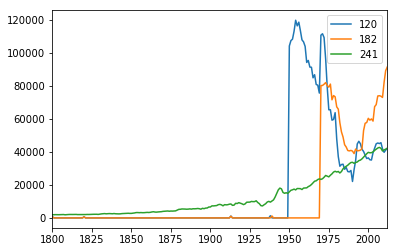

In [14]:
# Solution for Question 2
import matplotlib.pyplot as plt
% matplotlib inline

#print(gdp_percap_data.head(15))
sums = gdp_percap_data.iloc[1:,:].sum(axis=0)
topThree = sums.sort_values(ascending=False)
topThreeList = list(topThree.iloc[0:3].index)
topThreeList

topThree_df = gdp_percap_data.iloc[:,topThreeList].fillna(value=0)

topThree_df.iloc[1:,].plot()


***
__Question 3:__ (2.0 points) Print the name of all countries (if any) that contains no NaNs in their GDP series, that is, no missing data. Graphically display the series of those countries.

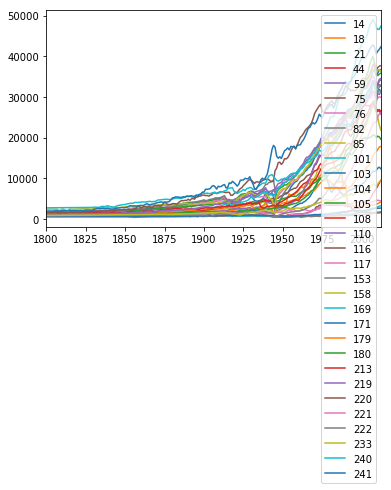

In [18]:
# Solution for Question 3
#% matplotlib inline

sumsNaN = gdp_percap_data.iloc[1:,:].sum(axis=0,skipna=False)
non_NA = sumsNaN.notnull()
list_non_NA = list(sums[non_NA].index)

noBlanks_DF = gdp_percap_data.iloc[1:,list_non_NA]
noBlanks_DF.plot()



***
__Question 4:__ (3.0 points) Read the file "countries.csv" and create a DataFrame with rows indexed by countries. The DataFrame must containing the columns "Life expectancy", "Population", and "Average GDP". This DataFrame should be a merge of proper columns from "countries.csv", with the column "Average GDP" computed from the DataFrame created in Question 1. Print the ten first rows from the created DataFrame.<br>
__Hint:__ Use pd.mean to generate the "Average GDP" column. Replace NaN by zero when computing the average value.

In [67]:
# Solution for Question 4

countries_data = pd.read_csv('countries.csv', sep=';')
country_data_select = countries_data.loc[:,['Country (en)','Life expectancy', 'Population']]

#print(country_data_select)

gdp_percap_dataT = gdp_percap_data.transpose().set_index('GDP per capita')
gdp_avg = pd.DataFrame(gdp_percap_dataT.mean(axis=1, skipna=True))
#print(gdp_avg)

#target_data = country_data_select.merge(gdp_avg, left_on = 'Country (en)',right_index=True)
print(country_data_select.shape, len(gdp_avg),type(gdp_avg))
merged_result = pd.merge(country_data_select,gdp_avg,how='inner',left_on='Country (en)',right_index=True)

merged_result

#need to add column name! 


(248, 3) 260 <class 'pandas.core.frame.DataFrame'>


,Country (en),Life expectancy,Population,0
0,Afghanistan,51.3,33332025,817.075676
1,Egypt,72.7,94666993,3079.916993
3,Albania,78.3,3038594,3212.062887
4,Algeria,76.8,40263711,4375.433233
5,American Samoa,75.4,54194,6146.333068
6,Andorra,82.8,85660,28982.093514
7,Angola,56.0,20172332,3534.430949
8,Anguilla,81.4,16752,11567.033135
10,Antigua and Barbuda,76.5,93581,9408.453368
11,Equatorial Guinea,64.2,759451,2998.514246


***
__Question 5:__ (1.5 points) Sort the DataFrame created in Question 4 in decreasing order acording to the column "Average GDP" and make a scatter plot of "Population" $\times$ "Life expectancy" for the 100 first countries in the sorted list. Apply the logarithm function to the column "Population" before generating the plot. Normalize the "Average GDP" and scale the plotted points according to the normalized "Average GDP". Your plot should be similar to the following one:
![title](dfscatter.png)

In [ ]:
# Solution for Question 5

plt.show()